# Using Movie Synopsis to Predict Genre with NLP

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

dataframe = pd.read_csv('/Users/Micha/Desktop/archive/movie_metadata/movie_meta_data.csv')
dataframe = dataframe.truncate(before=0, after=1000)

First, we import the Movie Medata into a dataframe, then plot the genre count's below. 

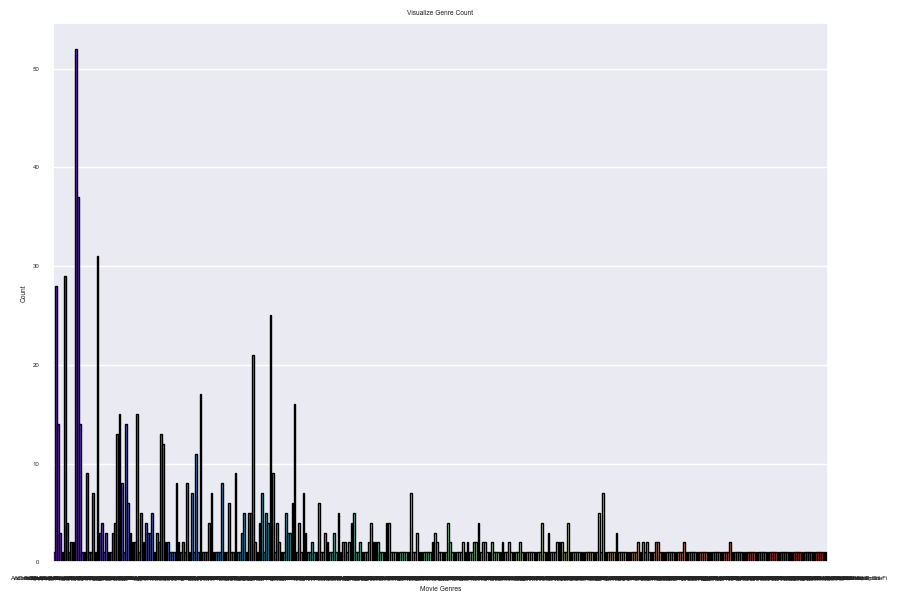

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(x='genres', data=dataframe, palette='rainbow', edgecolor=(0,0,0))
plt.xlabel("Movie Genres")
plt.ylabel("Count")
plt.title('Visualize Genre Count')
plt.show()

At this point, I noticed that there were multiple genres associated with each movie, so I decided to remove all but the first genre in each row and replot. 

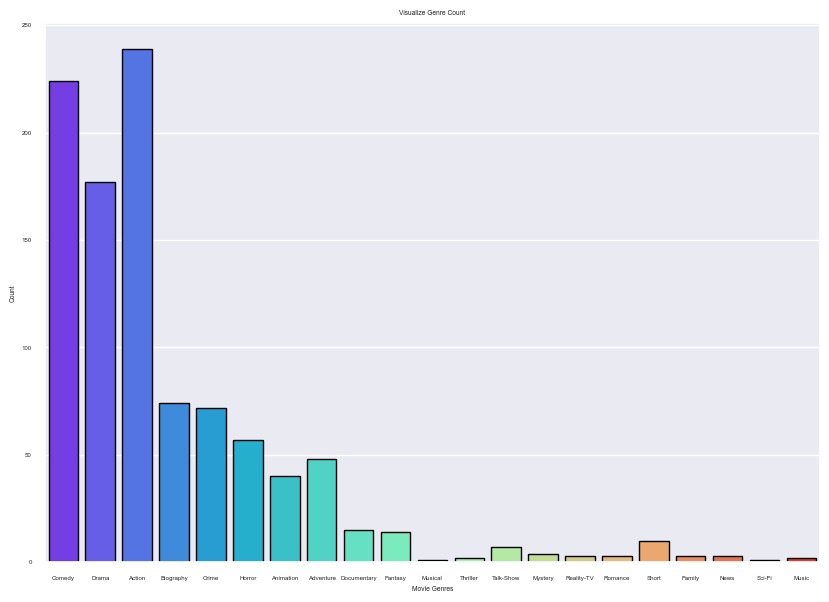

In [13]:
dataframe["genres"] =  dataframe["genres"].str.split(',').str[0]
plt.figure(figsize=(10,7))
sns.countplot(x='genres', data=dataframe, palette='rainbow', edgecolor=(0,0,0))
sns.set(font_scale=0.4)
plt.xlabel("Movie Genres")
plt.ylabel("Count")
plt.title('Visualize Genre Count')
plt.show()

As we can see, there are plenty of genres. Later in the project, I will combine many of them that are similar in order to make more accurate predictions. 

To make things easier, we are going to drop all columns besides synopsis and the genre and clean any rows that have values NaN for either genre or synopsis. Then, I am going to map each genre to a value corresponding to the dictionary below.

In [14]:
dataframe = dataframe[['genres','synopsis']]
dataframe = dataframe.dropna()
dataframe = dataframe.reset_index()
genre_mapper = {'Comedy': 0, 'Drama': 1, 'Action':2,  'Biography': 3, 'Crime':4,  'Horror':5, 'Animation':6,
 'Adventure':7, 'Documentary':8, 'Fantasy':9, 'Musical':10, 'Thriller':12, 'Talk-Show':13,
 'Mystery':14, 'Reality-TV':15, 'Romance':16, 'Short':17, 'Family':18, 'News':19, 'Sci-Fi':20,
 'Music':21, 'History':22, 'Western':23, 'Game-Show':24, 'War':25, 'Film-Noir':26}
dataframe['genres'] = dataframe['genres'].map(genre_mapper)
print(dataframe.head())

   index  genres                                           synopsis
0      3       0  In a New York City residence, Pierre Delacroix...
1      4       0  A tumbleweed rolls up a hillside just outside ...
2      6       3  In 1280, King Edward "Longshanks" invades and ...
3      7       0  The plot follows five students at fictional Sh...
4      8       2  Ten years after a covert military experiment o...


Now, we process each dialog by removing all special characters, lowercasing, tokenizing, and then stemming each word, and creating a corpus similar to HW 2. For simplicity and for demonstration, I will be truncating the dataframe to only include around 100 synopsis. 

In [15]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import re

corpus = []
ps = PorterStemmer()

for i in range(0, dataframe.shape[0]):
    synopsis = re.sub(pattern='[^a-zA-Z]', repl=' ',string=str(dataframe['synopsis'][i]))
    synopsis = synopsis.lower()
    words = synopsis.split()
    synopsis_words = [word for word in words if word not in set(stopwords.words('english'))]
    words = [ps.stem(word) for word in synopsis_words]
    stemmed_synopsis = ' '.join(words)
    corpus.append(stemmed_synopsis)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

vectorizer = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = vectorizer.fit_transform(corpus).toarray()

y = dataframe['genres'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

score1 = accuracy_score(y_test, y_pred)
print("Accuracy : {}%".format(round(score1*100,2)))

Accuracy : 84.95%
